# Pour le polluant NO2

### On importe les bibliothèques

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Conversion des données en DataFrame

In [26]:
import requests
import pandas as pd

# Récupérer les données
url = "https://data.airpl.org/api/v1/mesure/mensuelle/"
params = {
    "code_configuration_de_mesure__code_point_de_prelevement__code_polluant": "03",
    "date_heure_tu__range": "2021-1-1,2023-12-31",
    "code_configuration_de_mesure__code_point_de_prelevement__code_station__code_commune__code_departement__in": "44,49,53,72,85",
    "export": "json"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    dfNO2 = pd.DataFrame(data['results'])  # Adapter selon la structure des données JSON

    # Sauvegarder le DataFrame pour utilisation ultérieure
    dfNO2.to_pickle('NO2.pkl')
else:
    print(f"Erreur {response.status_code}: {response.text}")


In [27]:
# Charger le DataFrame depuis le fichier sauvegardé
dfNO2 = pd.read_pickle('NO2.pkl')

# Afficher les types de chaque colonne
print(dfNO2.dtypes)

id                               object
code_polluant                    object
code_point_de_prelevement        object
code_station                     object
nom_station                      object
nom_commune                      object
code_commune                     object
departement_code                 object
departement_nom                  object
code_zone_affichage               int64
date_heure_tu                    object
date_heure_local                 object
valeur_originale                float64
valeur                          float64
validite                           bool
code_configuration_de_mesure     object
dtype: object


In [28]:
print(dfNO2.head(10))

                                 id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_NO2_A            03               FR23003_NO2   
1  2023-12-01 00:00:00FR23068_NO2_A            03               FR23068_NO2   
2  2023-12-01 00:00:00FR23070_NO2_A            03               FR23070_NO2   
3  2023-12-01 00:00:00FR23075_NO2_A            03               FR23075_NO2   
4  2023-12-01 00:00:00FR23078_NO2_A            03               FR23078_NO2   
5  2023-12-01 00:00:00FR23107_NO2_A            03               FR23107_NO2   
6  2023-12-01 00:00:00FR23110_NO2_A            03               FR23110_NO2   
7  2023-12-01 00:00:00FR23120_NO2_A            03               FR23120_NO2   
8  2023-12-01 00:00:00FR23123_NO2_A            03               FR23123_NO2   
9  2023-12-01 00:00:00FR23124_NO2_A            03               FR23124_NO2   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    

## Analyse et correction du dataset

### Types et valeurs manquantes par variable

In [29]:
dfNO2.shape

(815, 16)

In [30]:
dfNO2.info

<bound method DataFrame.info of                                    id code_polluant code_point_de_prelevement  \
0    2023-12-01 00:00:00FR23003_NO2_A            03               FR23003_NO2   
1    2023-12-01 00:00:00FR23068_NO2_A            03               FR23068_NO2   
2    2023-12-01 00:00:00FR23070_NO2_A            03               FR23070_NO2   
3    2023-12-01 00:00:00FR23075_NO2_A            03               FR23075_NO2   
4    2023-12-01 00:00:00FR23078_NO2_A            03               FR23078_NO2   
..                                ...           ...                       ...   
810  2021-01-01 00:00:00FR23182_NO2_A            03               FR23182_NO2   
811  2021-01-01 00:00:00FR23188_NO2_A            03               FR23188_NO2   
812  2021-01-01 00:00:00FR23238_NO2_A            03               FR23238_NO2   
813  2021-01-01 00:00:00FR23239_NO2_A            03               FR23239_NO2   
814  2021-01-01 00:00:00FR23249_NO2_A            03               FR23249_NO2

In [31]:
dfNO2.isnull().sum()

id                               0
code_polluant                    0
code_point_de_prelevement        0
code_station                     0
nom_station                      0
nom_commune                      0
code_commune                     0
departement_code                 0
departement_nom                  0
code_zone_affichage              0
date_heure_tu                    0
date_heure_local                 0
valeur_originale                23
valeur                          23
validite                         0
code_configuration_de_mesure     0
dtype: int64

Observations : 
- On remarque que pour les colonnes "valeur_originale" et "valeur" on a quelques lignes vides (6), mais aucune colonne entièrement vide
- Les types des différentes colonnes semblent cohérant par rapport à ce qu'elles affichent

## Visualiser les différentes données de chaque colonne

### Pour les colonnes de type float64

In [32]:
for col in dfNO2.select_dtypes('float64'):
    print(f'{col :-<20} {dfNO2[col].unique()}')

valeur_originale---- [ 5.181862  4.513369  7.214065  8.705838  8.538575 12.451524  6.863239
 12.307538 10.268282  3.809133  9.347953  8.323468 10.535003  4.044691
  8.123403  6.718576  8.73732  12.035717 13.402711 23.235899  8.230301
 28.823063 20.235189  5.592512  4.213123  6.10525   9.170144  8.924385
 12.989726  7.841713 12.578621  9.561076  3.170729  9.409768  9.033843
 11.157008  4.088997  8.055583  6.892419  8.774524 12.086204       nan
 14.965971 24.276299  7.589769 31.000233  4.784885  4.156489  4.142037
  8.910948  8.8202   12.140816  6.03691  13.074328 10.557023  2.938489
 10.068935  7.833569 11.032258  4.163856  7.107829  6.44714   7.659253
 11.297524 13.341825 27.076187  8.367817 34.958893  6.377086  3.939876
  4.651929  8.905139  8.916006 10.773831  6.666979 11.940519  8.766806
  3.476602  8.680845  6.88194  10.332777  4.716724  7.422079  7.031448
  7.063163  9.564095 13.965815 29.872358  9.346852 34.871292  3.82726
  2.02569   2.578886  4.50793   4.515087  5.001012  2.696

In [33]:
for col in dfNO2.select_dtypes('int64'):
    print(f'{col :-<20} {dfNO2[col].unique()}')

code_zone_affichage- [ 3  4  1  2  5  6 13  7  8 11]


In [34]:
for col in dfNO2.select_dtypes('object'):
    print(f'{col :-<20} {dfNO2[col].unique()}')

id------------------ ['2023-12-01 00:00:00FR23003_NO2_A' '2023-12-01 00:00:00FR23068_NO2_A'
 '2023-12-01 00:00:00FR23070_NO2_A' '2023-12-01 00:00:00FR23075_NO2_A'
 '2023-12-01 00:00:00FR23078_NO2_A' '2023-12-01 00:00:00FR23107_NO2_A'
 '2023-12-01 00:00:00FR23110_NO2_A' '2023-12-01 00:00:00FR23120_NO2_A'
 '2023-12-01 00:00:00FR23123_NO2_A' '2023-12-01 00:00:00FR23124_NO2_A'
 '2023-12-01 00:00:00FR23150_NO2_A' '2023-12-01 00:00:00FR23152_NO2_A'
 '2023-12-01 00:00:00FR23174_NO2_A' '2023-12-01 00:00:00FR23177_NO2_1'
 '2023-12-01 00:00:00FR23178_NO2_1' '2023-12-01 00:00:00FR23181_NO2_1'
 '2023-12-01 00:00:00FR23182_NO2_A' '2023-12-01 00:00:00FR23188_NO2_A'
 '2023-12-01 00:00:00FR23239_NO2_A' '2023-12-01 00:00:00FR23242_NO2_1'
 '2023-12-01 00:00:00FR23249_NO2_A' '2023-12-01 00:00:00FR23251_NO2_1'
 '2023-12-01 00:00:00FR23252_NO2_1' '2023-11-01 00:00:00FR23003_NO2_A'
 '2023-11-01 00:00:00FR23068_NO2_A' '2023-11-01 00:00:00FR23070_NO2_A'
 '2023-11-01 00:00:00FR23075_NO2_A' '2023-11-01 00:00:00

Observations : 
- on remarque que pour les colonnes de type float64, pour les colonnes "valeur_originale" et "valeur", des valeurs ne sont pas correctes car il y à une présence de "nan" et "-999.".
- Nous allons donc supprimer les lignes ou ces dernières sont présentes, et donc supprimer toutes les valeurs qui seront négatives pour englober.

### Supression des valeurs "nan" et "-999" pour les colonnes "valeur_originale" et "valeur"

In [35]:
import pandas as pd

# Assurez-vous que dfNO2 est bien chargé et nettoyé

# Supprimer les lignes comportant des valeurs "NaN" dans les colonnes "valeur" et "valeur_originale"
dfNO2.dropna(subset=['valeur', 'valeur_originale'], inplace=True)

# Supprimer les lignes comportant des valeurs négatives dans les colonnes "valeur" et "valeur_originale"
dfNO2 = dfNO2[(dfNO2['valeur'] >= 0) & (dfNO2['valeur_originale'] >= 0)]

# Afficher les premières lignes du DataFrame pour vérifier le nettoyage
print(dfNO2.head())


                                 id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_NO2_A            03               FR23003_NO2   
1  2023-12-01 00:00:00FR23068_NO2_A            03               FR23068_NO2   
2  2023-12-01 00:00:00FR23070_NO2_A            03               FR23070_NO2   
3  2023-12-01 00:00:00FR23075_NO2_A            03               FR23075_NO2   
4  2023-12-01 00:00:00FR23078_NO2_A            03               FR23078_NO2   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23075               JULES VERNE                   Trignac   
4      FR23078             SAINT EXUPERY                    Cholet   

  code_commune departement_code   departement_nom  code_zone_affichage  \
0        44052               4

In [36]:
for col in dfNO2.select_dtypes('float64'):
    print(f'{col :-<20} {dfNO2[col].unique()}')

valeur_originale---- [ 5.181862  4.513369  7.214065  8.705838  8.538575 12.451524  6.863239
 12.307538 10.268282  3.809133  9.347953  8.323468 10.535003  4.044691
  8.123403  6.718576  8.73732  12.035717 13.402711 23.235899  8.230301
 28.823063 20.235189  5.592512  4.213123  6.10525   9.170144  8.924385
 12.989726  7.841713 12.578621  9.561076  3.170729  9.409768  9.033843
 11.157008  4.088997  8.055583  6.892419  8.774524 12.086204 14.965971
 24.276299  7.589769 31.000233  4.784885  4.156489  4.142037  8.910948
  8.8202   12.140816  6.03691  13.074328 10.557023  2.938489 10.068935
  7.833569 11.032258  4.163856  7.107829  6.44714   7.659253 11.297524
 13.341825 27.076187  8.367817 34.958893  6.377086  3.939876  4.651929
  8.905139  8.916006 10.773831  6.666979 11.940519  8.766806  3.476602
  8.680845  6.88194  10.332777  4.716724  7.422079  7.031448  7.063163
  9.564095 13.965815 29.872358  9.346852 34.871292  3.82726   2.02569
  2.578886  4.50793   4.515087  5.001012  2.696076  6.424

## Comparaison avec les valeurs de seuils

Nous faisons le choix dans un premier temps de ne traiter que les données mensuelles, en prenant en granularité les données mensuelles, de manière à comparer les trimestres des différentes années
De plus de même manière que pour le PM10, nous décidons de diviser par 2 les valeurs de seuils officielles de manière à rendre l'exercice plus intéressant pour avoir des résultats
De plus nous allons créer des valeurs mensuelles pour visualiser ces données sur une échelle trimestrielle

In [37]:
# Définition des nouveaux seuils pour les particules NO2 en µg/m3 annuelle
OBJECTIF_QUALITE_NO2 = 20  # en moyenne annuelle, 40 officiels
VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2 = 20  # en moyenne annuelle, 40 officiels
NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2 = 15  # en moyenne annuelle d'oxydes d'azotes, 30 officiels

print(f"Objectif de qualité NO2 : {OBJECTIF_QUALITE_NO2} µg/m3 (en moyenne annuelle)")
print(f"Valeur limite pour la protection de la santé humaine NO2 : {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2} µg/m3 (en moyenne annuelle)")
print(f"Niveau critique pour la protection de la végétation NO2 : {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2} µg/m3 (en moyenne annuelle d'oxydes d'azotes)")

# Définition des nouveaux seuils pour les particules NO2 en µg/m3 mensuelle
OBJECTIF_QUALITE_NO2_MENSUEL = 17  # en moyenne mensuelle
VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL = 17  # en moyenne mensuelle
NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL = 12  # en moyenne mensuelle d'oxydes d'azotes

print(f"Objectif de qualité NO2 (mensuel) : {OBJECTIF_QUALITE_NO2_MENSUEL} µg/m3 (en moyenne mensuelle)")
print(f"Valeur limite pour la protection de la santé humaine NO2 (mensuel) : {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL} µg/m3 (en moyenne mensuelle)")
print(f"Niveau critique pour la protection de la végétation NO2 (mensuel) : {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL} µg/m3 (en moyenne mensuelle d'oxydes d'azotes)")


Objectif de qualité NO2 : 20 µg/m3 (en moyenne annuelle)
Valeur limite pour la protection de la santé humaine NO2 : 20 µg/m3 (en moyenne annuelle)
Niveau critique pour la protection de la végétation NO2 : 15 µg/m3 (en moyenne annuelle d'oxydes d'azotes)
Objectif de qualité NO2 (mensuel) : 17 µg/m3 (en moyenne mensuelle)
Valeur limite pour la protection de la santé humaine NO2 (mensuel) : 17 µg/m3 (en moyenne mensuelle)
Niveau critique pour la protection de la végétation NO2 (mensuel) : 12 µg/m3 (en moyenne mensuelle d'oxydes d'azotes)


In [38]:
# Convertir les colonnes de date en format datetime
dfNO2['date_heure_tu'] = pd.to_datetime(dfNO2['date_heure_tu'])

# Ajouter des colonnes de comparaison avec les seuils (variable cible)
dfNO2['cible_objectif_qualite_NO2'] = (dfNO2['valeur'] > OBJECTIF_QUALITE_NO2).astype(int)
dfNO2['cible_valeur_limite_protection_sante_humaine_NO2'] = (dfNO2['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2).astype(int)
dfNO2['cible_niveau_critique_protection_vegetation_NO2'] = (dfNO2['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2).astype(int)
dfNO2['cible_objectif_qualite_NO2_mensuel'] = (dfNO2['valeur'] > OBJECTIF_QUALITE_NO2_MENSUEL).astype(int)
dfNO2['cible_valeur_limite_protection_sante_humaine_NO2_mensuel'] = (dfNO2['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL).astype(int)
dfNO2['cible_niveau_critique_protection_vegetation_NO2_mensuel'] = (dfNO2['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL).astype(int)

# Afficher les premières lignes du DataFrame avec les nouvelles colonnes de comparaison
print(dfNO2.head())

# Sauvegarder le DataFrame avec les nouvelles colonnes de comparaison
dfNO2.to_pickle('PM10_with_comparison.pkl')

                                 id code_polluant code_point_de_prelevement  \
0  2023-12-01 00:00:00FR23003_NO2_A            03               FR23003_NO2   
1  2023-12-01 00:00:00FR23068_NO2_A            03               FR23068_NO2   
2  2023-12-01 00:00:00FR23070_NO2_A            03               FR23070_NO2   
3  2023-12-01 00:00:00FR23075_NO2_A            03               FR23075_NO2   
4  2023-12-01 00:00:00FR23078_NO2_A            03               FR23078_NO2   

  code_station               nom_station               nom_commune  \
0      FR23003              LA MEGRETAIS                    Donges   
1      FR23068                   FROSSAY                   Frossay   
2      FR23070  SAINT ETIENNE DE MONTLUC  Saint-Etienne-De-Montluc   
3      FR23075               JULES VERNE                   Trignac   
4      FR23078             SAINT EXUPERY                    Cholet   

  code_commune departement_code   departement_nom  code_zone_affichage  ...  \
0        44052           

In [39]:
# Afficher le nombre de valeurs 0 et 1 dans la colonne 'cible_objectif_qualite_PM10'
print(dfNO2['cible_objectif_qualite_NO2'].value_counts())
print(dfNO2['cible_valeur_limite_protection_sante_humaine_NO2'].value_counts())
print(dfNO2['cible_niveau_critique_protection_vegetation_NO2'].value_counts())
print(dfNO2['cible_objectif_qualite_NO2_mensuel'].value_counts())
print(dfNO2['cible_valeur_limite_protection_sante_humaine_NO2_mensuel'].value_counts())
print(dfNO2['cible_niveau_critique_protection_vegetation_NO2_mensuel'].value_counts())

cible_objectif_qualite_NO2
0    745
1     47
Name: count, dtype: int64
cible_valeur_limite_protection_sante_humaine_NO2
0    745
1     47
Name: count, dtype: int64
cible_niveau_critique_protection_vegetation_NO2
0    696
1     96
Name: count, dtype: int64
cible_objectif_qualite_NO2_mensuel
0    722
1     70
Name: count, dtype: int64
cible_valeur_limite_protection_sante_humaine_NO2_mensuel
0    722
1     70
Name: count, dtype: int64
cible_niveau_critique_protection_vegetation_NO2_mensuel
0    621
1    171
Name: count, dtype: int64


## Visualisation des données par des graphiques

Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualite_NO2 (valeur de seuil = 20, en rouge quand depassé)

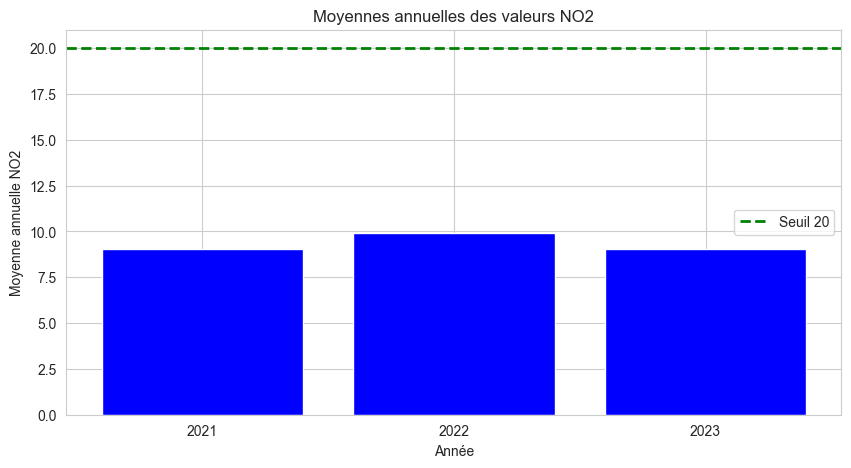

In [40]:
# Grouper les données par année
dfNO2['année'] = dfNO2['date_heure_tu'].dt.year
annual_means_NO2 = dfNO2.groupby('année')['valeur'].mean().reset_index()

# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means_NO2['depasse_seuil'] = (annual_means_NO2['valeur'] > OBJECTIF_QUALITE_NO2).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means_NO2['depasse_seuil']]
plt.bar(annual_means_NO2['année'], annual_means_NO2['valeur'], color=colors)
plt.axhline(y=OBJECTIF_QUALITE_NO2, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_NO2}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle NO2')
plt.title('Moyennes annuelles des valeurs NO2')
plt.xticks(annual_means_NO2['année'])
plt.legend()
plt.show()


Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de cible_valeur_limite_protection_sante_humaine_NO2 (valeur de seuil = 20, en rouge quand depassé)

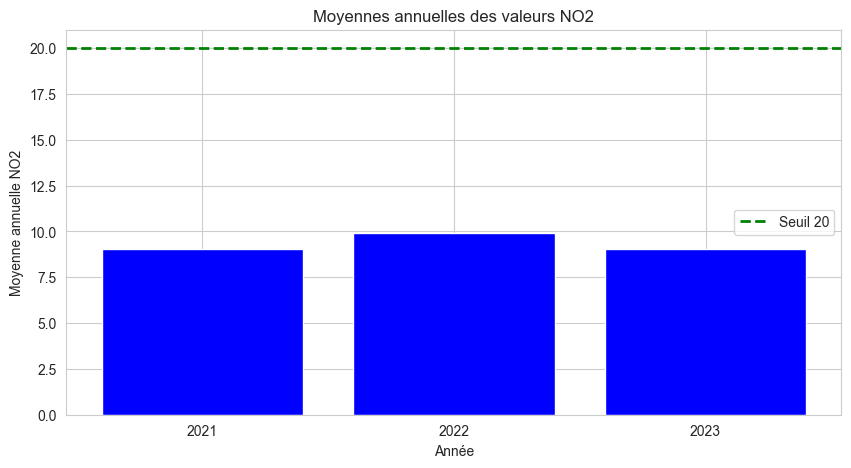

In [41]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means_NO2['depasse_seuil'] = (annual_means_NO2['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means_NO2['depasse_seuil']]
plt.bar(annual_means_NO2['année'], annual_means_NO2['valeur'], color=colors)
plt.axhline(y=VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2, color='green', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle NO2')
plt.title('Moyennes annuelles des valeurs NO2')
plt.xticks(annual_means_NO2['année'])
plt.legend()
plt.show()


Graphique pour voir par année, quand est-ce qu'on à dépassé le seuil de cible_niveau_critique_protection_vegetation_NO2 (valeur de seuil = 15, en rouge quand depassé)

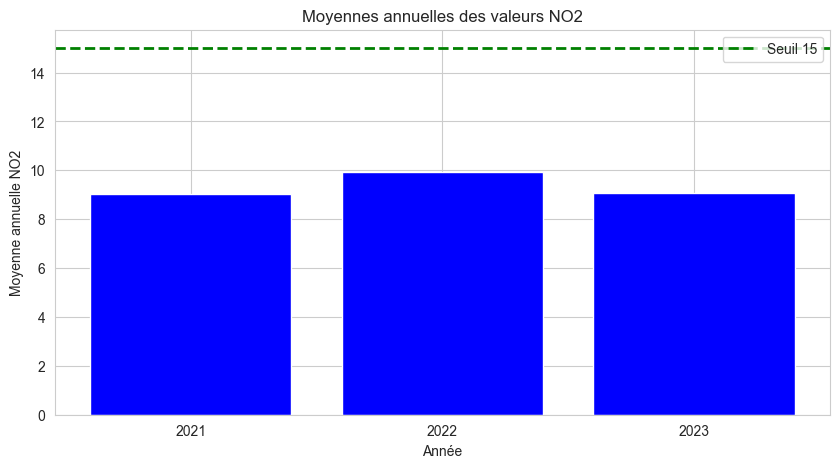

In [42]:
# Créer la colonne indiquant si la moyenne annuelle dépasse le seuil
annual_means_NO2['depasse_seuil_vegetation'] = (annual_means_NO2['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means_NO2['depasse_seuil_vegetation']]
plt.bar(annual_means_NO2['année'], annual_means_NO2['valeur'], color=colors)
plt.axhline(y=NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2, color='green', linestyle='--', linewidth=2, label=f'Seuil {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2}')
plt.xlabel('Année')
plt.ylabel('Moyenne annuelle NO2')
plt.title('Moyennes annuelles des valeurs NO2')
plt.xticks(annual_means_NO2['année'])
plt.legend()
plt.show()


#### Fusion des 3 graphiques, si un des seuils est dépassé, la colonne devient rouge

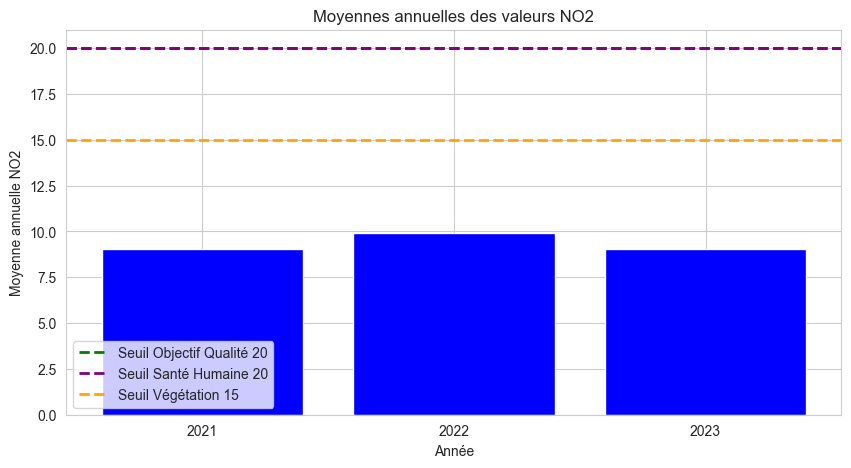

In [43]:
# Créer la colonne indiquant si la moyenne annuelle dépasse un des seuils
annual_means_NO2['depasse_seuil'] = ((annual_means_NO2['valeur'] > OBJECTIF_QUALITE_NO2) |
                                     (annual_means_NO2['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2) |
                                     (annual_means_NO2['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2)).astype(int)

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 5))
colors = ['red' if x == 1 else 'blue' for x in annual_means_NO2['depasse_seuil']]
plt.bar(annual_means_NO2['année'], annual_means_NO2['valeur'], color=colors)

# Ajouter les droites de seuil
plt.axhline(y=OBJECTIF_QUALITE_NO2, color='green', linestyle='--', linewidth=2, label=f'Seuil Objectif Qualité {OBJECTIF_QUALITE_NO2}')
plt.axhline(y=VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2, color='purple', linestyle='--', linewidth=2, label=f'Seuil Santé Humaine {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2}')
plt.axhline(y=NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2, color='orange', linestyle='--', linewidth=2, label=f'Seuil Végétation {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2}')

plt.xlabel('Année')
plt.ylabel('Moyenne annuelle NO2')
plt.title('Moyennes annuelles des valeurs NO2')
plt.xticks(annual_means_NO2['année'])
plt.legend()
plt.show()


Graphique pour voir par année et par mois, quand est-ce qu'on à dépassé le seuil de cible_objectif_qualite_NO2_mensuel (valeur de seuil = 17, en rouge quand depassé)

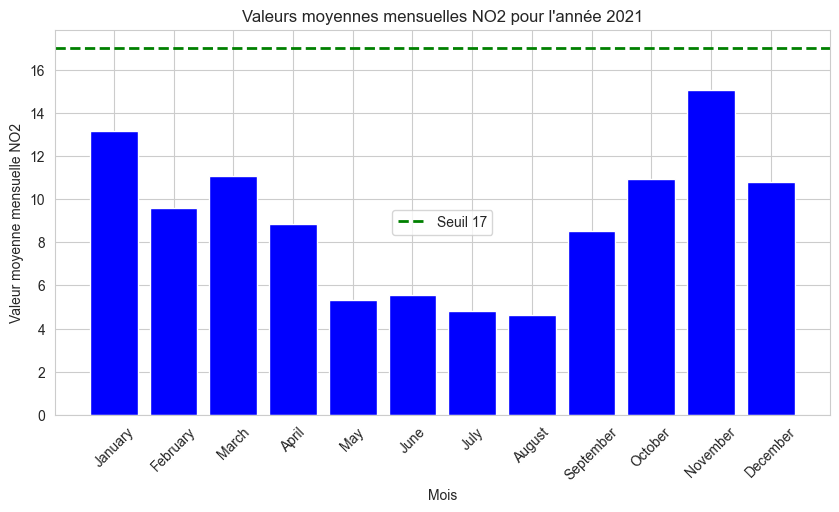

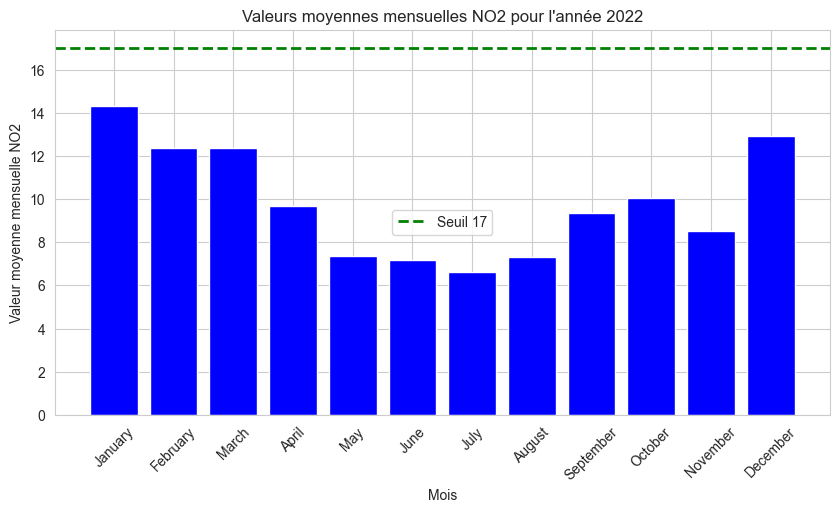

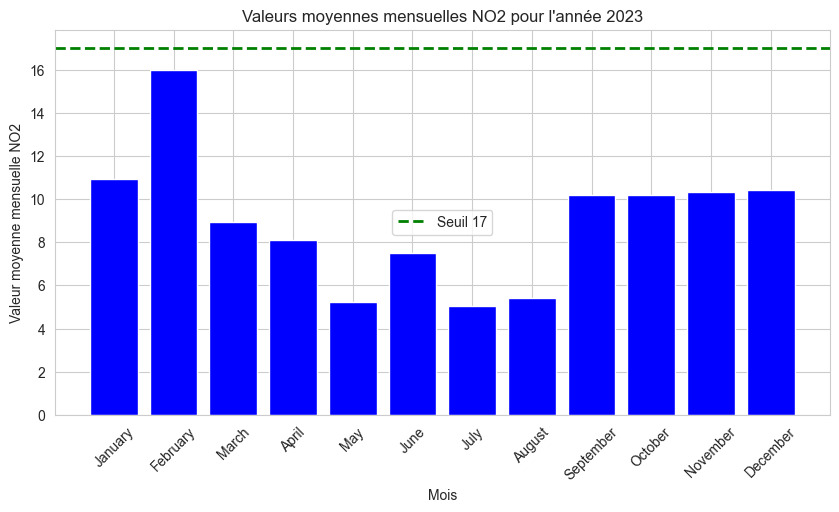

In [44]:
import calendar 

# Grouper les données par année et mois
dfNO2['année'] = dfNO2['date_heure_tu'].dt.year
dfNO2['mois'] = dfNO2['date_heure_tu'].dt.month
grouped = dfNO2.groupby(['année', 'mois'])[['valeur']].mean().reset_index()

# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_seuil'] = (grouped['valeur'] > OBJECTIF_QUALITE_NO2_MENSUEL).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    plt.axhline(y=OBJECTIF_QUALITE_NO2_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {OBJECTIF_QUALITE_NO2_MENSUEL}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle NO2')
    plt.title(f'Valeurs moyennes mensuelles NO2 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


Graphique pour voir par année et par mois, quand est-ce qu'on à dépassé le seuil de cible_valeur_limite_protection_sante_humaine_NO2_mensuel (valeur de seuil = 17, en rouge quand depassé)

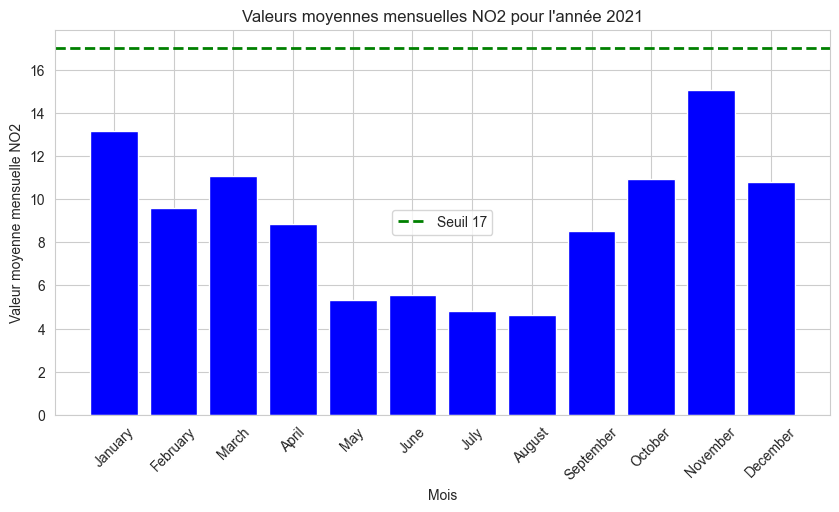

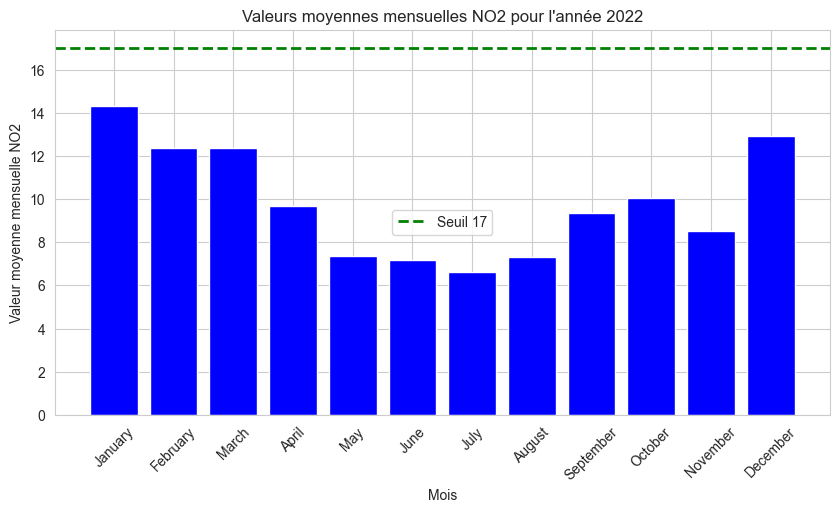

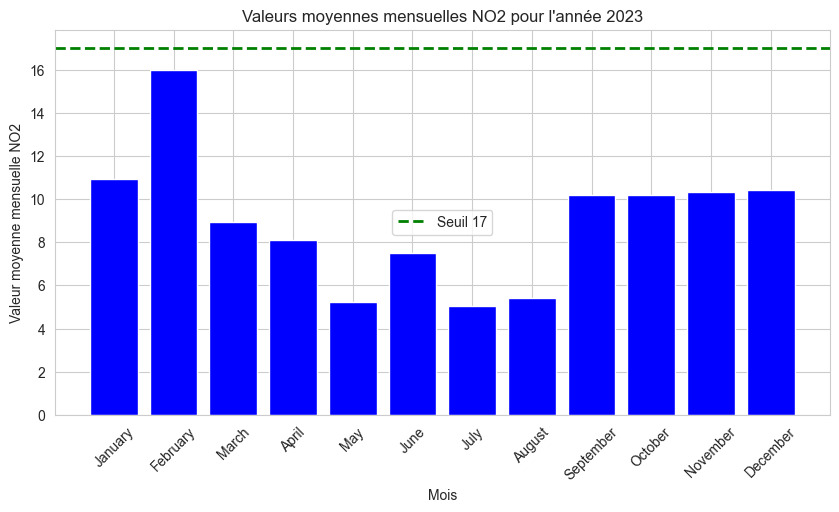

In [45]:
# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_seuil'] = (grouped['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    plt.axhline(y=VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle NO2')
    plt.title(f'Valeurs moyennes mensuelles NO2 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


Graphique pour voir par année et par mois, quand est-ce qu'on à dépassé le seuil de cible_niveau_critique_protection_vegetation_NO2_mensuel (valeur de seuil = 12, en rouge quand depassé)

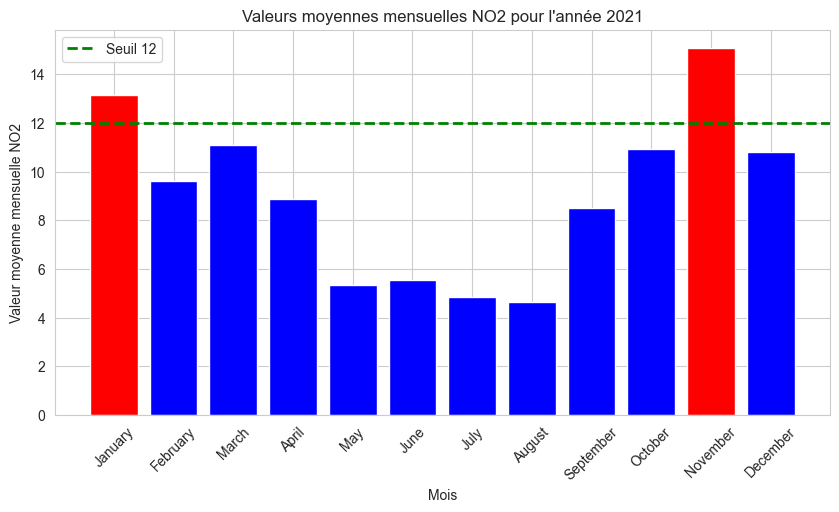

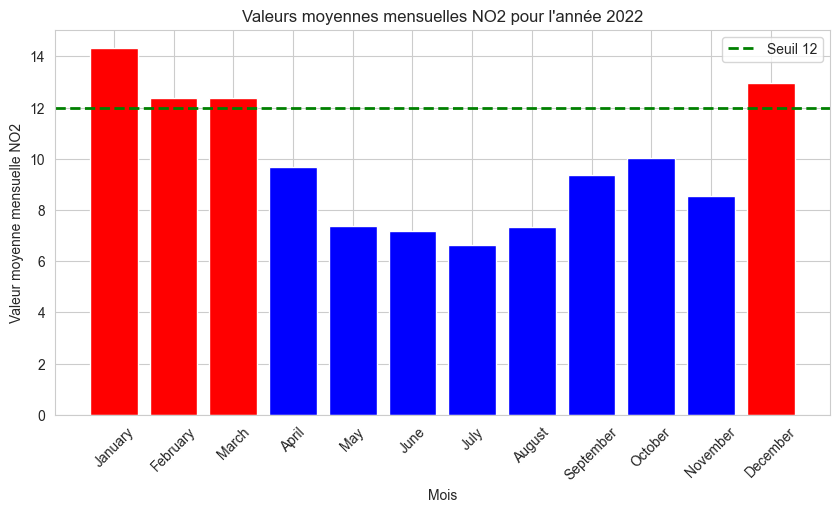

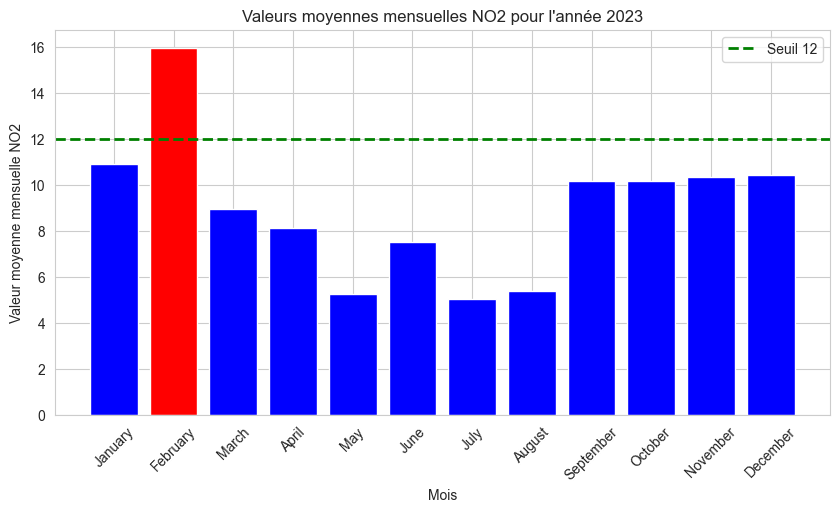

In [46]:
# Créer la colonne indiquant si la moyenne mensuelle dépasse le seuil
grouped['depasse_seuil'] = (grouped['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    plt.axhline(y=NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle NO2')
    plt.title(f'Valeurs moyennes mensuelles NO2 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


#### Fusion des 3 graphiques, si un des seuils est dépassé, la colonne devient rouge

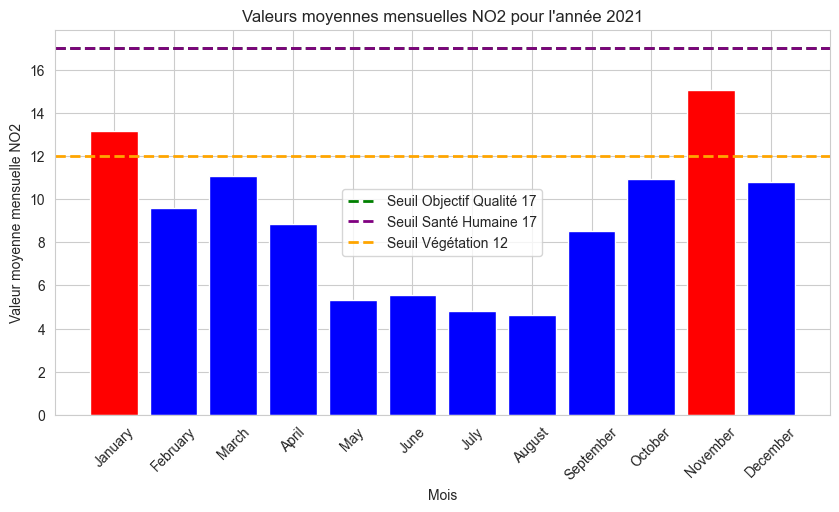

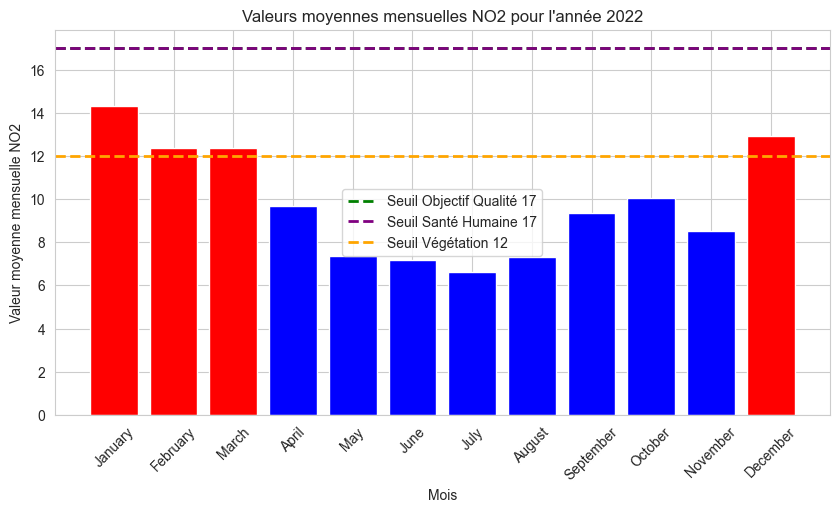

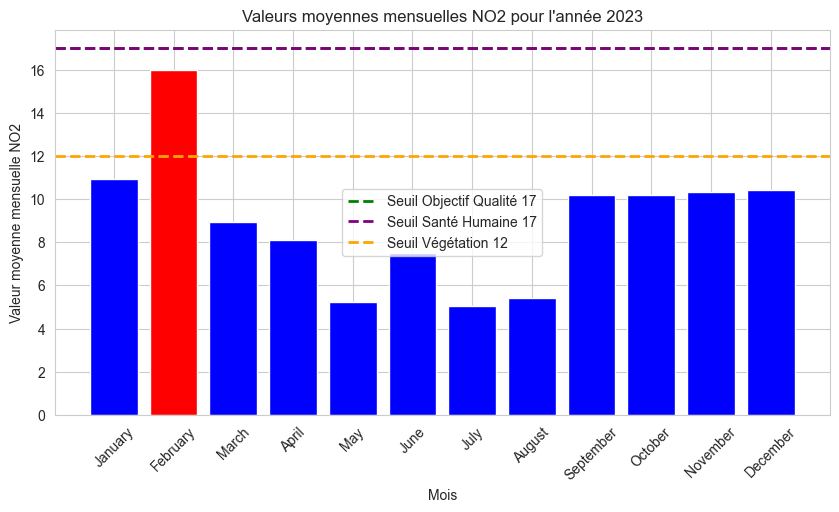

In [47]:
# Créer la colonne indiquant si la moyenne mensuelle dépasse un des seuils
grouped['depasse_seuil'] = ((grouped['valeur'] > OBJECTIF_QUALITE_NO2_MENSUEL) |
                            (grouped['valeur'] > VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL) |
                            (grouped['valeur'] > NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL)).astype(int)

# Créer le diagramme en bâtons pour chaque année
for year in grouped['année'].unique():
    plt.figure(figsize=(10, 5))
    subset = grouped[grouped['année'] == year]
    colors = ['red' if x == 1 else 'blue' for x in subset['depasse_seuil']]
    months = [calendar.month_name[m] for m in subset['mois']]
    plt.bar(months, subset['valeur'], color=colors)
    
    # Ajouter les droites de seuil
    plt.axhline(y=OBJECTIF_QUALITE_NO2_MENSUEL, color='green', linestyle='--', linewidth=2, label=f'Seuil Objectif Qualité {OBJECTIF_QUALITE_NO2_MENSUEL}')
    plt.axhline(y=VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL, color='purple', linestyle='--', linewidth=2, label=f'Seuil Santé Humaine {VALEUR_LIMITE_PROTECTION_SANTE_HUMAINE_NO2_MENSUEL}')
    plt.axhline(y=NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL, color='orange', linestyle='--', linewidth=2, label=f'Seuil Végétation {NIVEAU_CRITIQUE_PROTECTION_VEGETATION_NO2_MENSUEL}')
    
    plt.xlabel('Mois')
    plt.ylabel('Valeur moyenne mensuelle NO2')
    plt.title(f'Valeurs moyennes mensuelles NO2 pour l\'année {year}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
